In [1]:
from glob import glob
from os import path as op
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os, csv, math

logs = glob("../results/**/logs.csv", recursive=True)
dfs = [pd.read_csv(l).assign(exp=op.basename(op.dirname(l))) for l in logs]
df = pd.concat(dfs).sort_values(by="exp")
df = df[~df["exp"].str.contains("2a")]

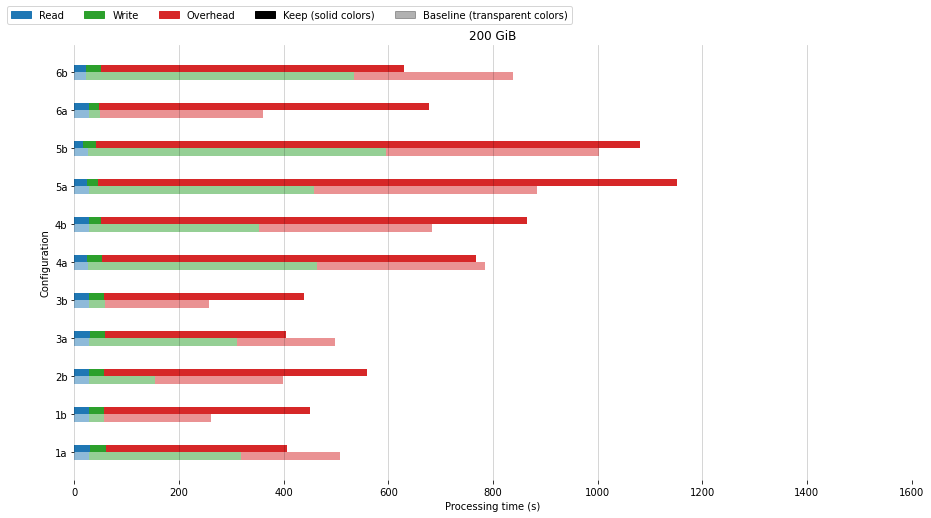

In [2]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 8), sharey=True)
fig, ax1 = plt.subplots(1,1,figsize=(15, 8), sharey=True)
for ax in [ax1] : #(ax1, ax2, ax3):
    ax.grid(True, axis='x', which='major', color='black', alpha=0.2, zorder=0)

def compute_graph(df, ax, title, legend=False, first=False):
    
    df["overhead"] = df[" elapsed time (s)"] - df[" read time (s)"] - df["  write time (s)"]
    df["cond"] = df["exp"].apply(lambda cell: cell.split('_')[-3])
    baseline = df[df["exp"].str.contains("baseline")].sort_values(by="cond")
    keep = df[df["exp"].str.contains("keep")].sort_values(by="cond")
    width = 0.20  # the width of the bars
    width_step = [width /2, width /2]
    x = np.arange(len(df["cond"].unique()))

    _ = ax.barh(x - width_step[0], baseline[" read time (s)"], width, label='read time (baseline)', color=['tab:blue'], alpha=0.5)
    _ = ax.barh(x - width_step[0], baseline["  write time (s)"], width, left=baseline[" read time (s)"], label='write time (baseline)', color=['tab:green'], alpha=0.5)
    _ = ax.barh(x - width_step[0], baseline["overhead"], width, left=baseline[" read time (s)"] + baseline["  write time (s)"], label='overhead time (baseline)', color=['tab:red'], alpha=0.5)

    bar1 = ax.barh(x + width_step[1], keep[" read time (s)"], width, label='read time (keep)', color=['tab:blue'])
    bar2 = ax.barh(x + width_step[1], keep["  write time (s)"], width, left=keep[' read time (s)'],label='write time (keep)', color=['tab:green'])
    bar4 = ax.barh(x + width_step[1], keep["overhead"], width, left=keep[' read time (s)'] + keep['  write time (s)'], label='overhead time (keep)', color=['tab:red'])

    ax.set_xlabel('Processing time (s)')
    if first:
        ax.set_ylabel('Configuration')
    ax.set_title(title)
    # ax.set_xticks(x)
    
    ref_names = df["cond"].unique()
    ax.set_yticks(range(len(ref_names)))
    ax.set_yticklabels(sorted(ref_names))
    ax.set_xlim(right=1600) #-> for 3500 img results
    
    return


compute_graph(df, ax1, '200 GiB', legend=False, first=True)

for spine in ax1.spines.values():
    spine.set_visible(False)
#for spine in ax2.spines.values():
#    spine.set_visible(False)
#for spine in ax3.spines.values():
#    spine.set_visible(False)
    
import matplotlib.patches as mpatches
p1 = mpatches.Patch(color='tab:blue', label='Read')
p2 = mpatches.Patch(color='tab:green', label='Write')
p4 = mpatches.Patch(color='tab:red', label='Overhead')
p5 = mpatches.Patch(color='black', label='Keep (solid colors)')
p6 = mpatches.Patch(color='black', alpha=0.3, label='Baseline (transparent colors)')
plt.legend(handles=[p1, p2, p4, p5, p6], ncol=6, bbox_to_anchor=(0.6, 1.1))

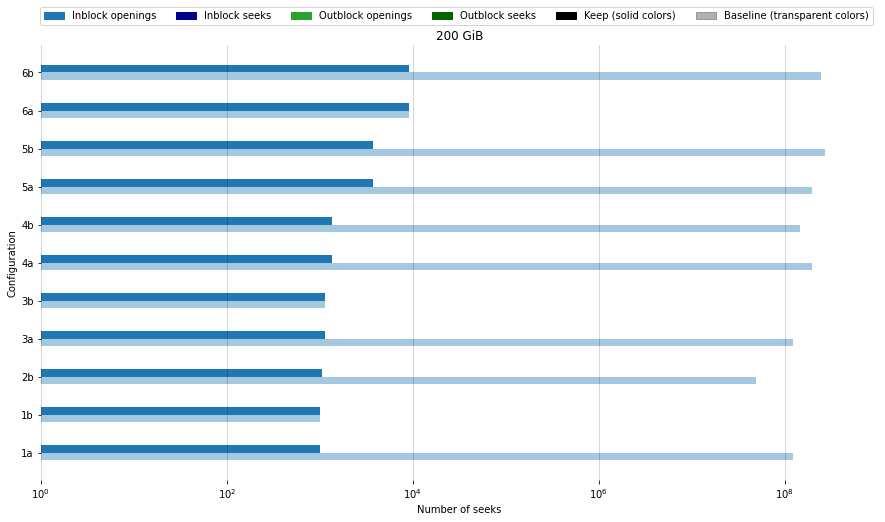

In [3]:
#fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15, 8), sharey=True)
fig, ax1 = plt.subplots(1,1,figsize=(15, 8), sharey=True)

for ax in [ax1]: #(ax1, ax2, ax3):
    ax.grid(True, axis='x', which='both', color='black', alpha=0.2, zorder=0)
    ax.set_xlim(1, 10**9)


def compute_graph(df, ax, title, legend=False, first=False):

    df["cond"] = df["exp"].apply(lambda cell: cell.split('_')[-3])
    baseline = df[df["exp"].str.contains("baseline")].sort_values(by="cond")
    keep = df[df["exp"].str.contains("keep")].sort_values(by="cond")
    
    x = np.arange(len(df["cond"].unique()))  # the label locations
    
    width = 0.20  # the width of the bars
    width_step = [width /2, width /2]
    
    _ = ax.barh(x - width/2, baseline["Seeks"], width, label='total seeks', color=['tab:blue'], alpha=0.4)

    
    _ = ax.barh(x + width/2, keep["Seeks"], width, label='total seeks', color=['tab:blue'])
   
    
    ax.set_xlabel('Number of seeks')
    if first:
        ax.set_ylabel('Configuration')
    ax.set_title(title)
    ax.set_xscale('log')
    
    ref_names = df["cond"].unique()
    ax.set_yticks(range(len(ref_names)))
    ax.set_yticklabels(sorted(ref_names))
    ax.set_yticklabels(ref_names)
    
    return 

compute_graph(df, ax1, '200 GiB', legend=False, first=True)

for spine in ax1.spines.values():
    spine.set_visible(False)

    
import matplotlib.patches as mpatches
p1 = mpatches.Patch(color='tab:green', label='Outblock openings')
p2 = mpatches.Patch(color='darkgreen', label='Outblock seeks')
p3 = mpatches.Patch(color='tab:blue', label='Inblock openings')
p4 = mpatches.Patch(color='darkblue', label='Inblock seeks')
p5 = mpatches.Patch(color='black', label='Keep (solid colors)')
p6 = mpatches.Patch(color='black', alpha=0.3, label='Baseline (transparent colors)')
plt.legend(handles=[p3, p4, p1, p2, p5, p6], ncol=6, bbox_to_anchor=(1., 1.1))
#plt.savefig('../../rechunk-paper/figures/seeks_3500.pdf', bbox_inches="tight")